# Лабораторная работа 2. Ассоциативные правила

**Цель работы:** исследование методов анализа ассоциативных правил.

**Датасет - 4-ый вариант:** https://www.kaggle.com/datasets/mathchi/online-retail-data-set-from-ml-repository

**Начальные параметры** для обоих алгоритмов: поддержка **0.15** и достоверность **0.4**.

**Описание**:

Это международный набор реальных данных, который содержит все транзакции, совершённые в период с 01/12/2010 по 09/12/2011 для британского интернет-магазина, работающего без физической торговой точки. Компания в основном продаёт уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовыми покупателями.

| Название переменной | Тип данных | Описание |
| :---: | :--- | :--- |
| **InvoiceNo** | Номинальная | Номер счёта. 6-значный числовой код, уникальный для каждой транзакции. Если код начинается с буквы 'c', это указывает на отмену. |
| **StockCode** | Номинальная | Код товара. 5-значный числовой код, уникальный для каждого отдельного продукта. |
| **Description** | Номинальная | Наименование товара. |
| **Quantity** | Числовая | Количество каждого товара в транзакции. |
| **InvoiceDate** | Числовая | Дата и время выставления счёта. День и время генерации каждой транзакции. |
| **UnitPrice** | Числовая | Цена за единицу. Цена товара за единицу в фунтах стерлингов (£). |
| **CustomerID** | Номинальная | Идентификатор клиента. 5-значный числовой код, уникальный для каждого клиента. |
| **Country** | Номинальная | Название страны. Страна, в которой проживает клиент. |

          0       1       2       3       4       5       6
0     Bread    Wine    Eggs    Meat  Cheese  Pencil  Diaper
1     Bread  Cheese    Meat  Diaper    Wine    Milk  Pencil
2    Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
3    Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
4      Meat  Pencil    Wine     NaN     NaN     NaN     NaN
..      ...     ...     ...     ...     ...     ...     ...
310   Bread    Eggs  Cheese     NaN     NaN     NaN     NaN
311    Meat    Milk  Pencil     NaN     NaN     NaN     NaN
312   Bread  Cheese    Eggs    Meat  Pencil  Diaper    Wine
313    Meat  Cheese     NaN     NaN     NaN     NaN     NaN
314    Eggs    Wine   Bagel   Bread    Meat     NaN     NaN

[315 rows x 7 columns]


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Artur\AppData\Local\Temp\ipykernel_3856\2721482596.py:9: SyntaxWarning: invalid escape sequence '\d'
  all_data = pd.read_csv('..\datasets\/retail_dataset.csv')


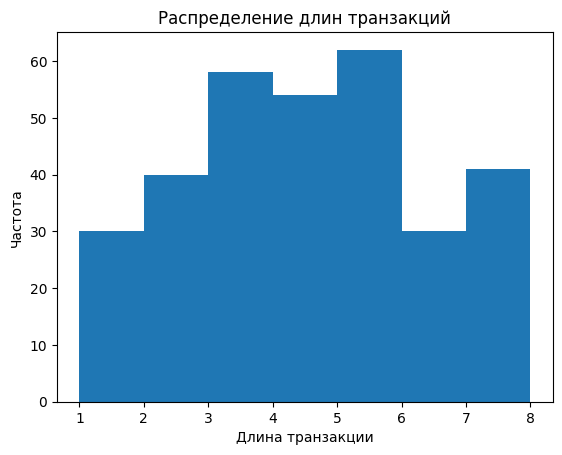

{'Meat', 'Milk', 'Cheese', 'Bagel', 'Bread', 'Eggs', 'Pencil', 'Diaper', 'Wine'}
      support                   itemsets
0    0.374603                     (Meat)
1    0.365079                     (Wine)
2    0.361905                     (Eggs)
3    0.323810                   (Cheese)
4    0.298413                   (Diaper)
..        ...                        ...
140  0.041270      (Cheese, Bread, Eggs)
141  0.038095  (Meat, Milk, Bread, Eggs)
142  0.031746  (Wine, Meat, Bread, Eggs)
143  0.031746  (Wine, Milk, Bread, Eggs)
144  0.063492      (Meat, Cheese, Bread)

[145 rows x 2 columns]
             antecedents   consequents  antecedent support  \
0                 (Meat)        (Milk)            0.374603   
1                 (Milk)        (Meat)            0.453968   
2                 (Wine)        (Meat)            0.365079   
3                 (Meat)        (Wine)            0.374603   
4                 (Wine)        (Milk)            0.365079   
..                   ...       

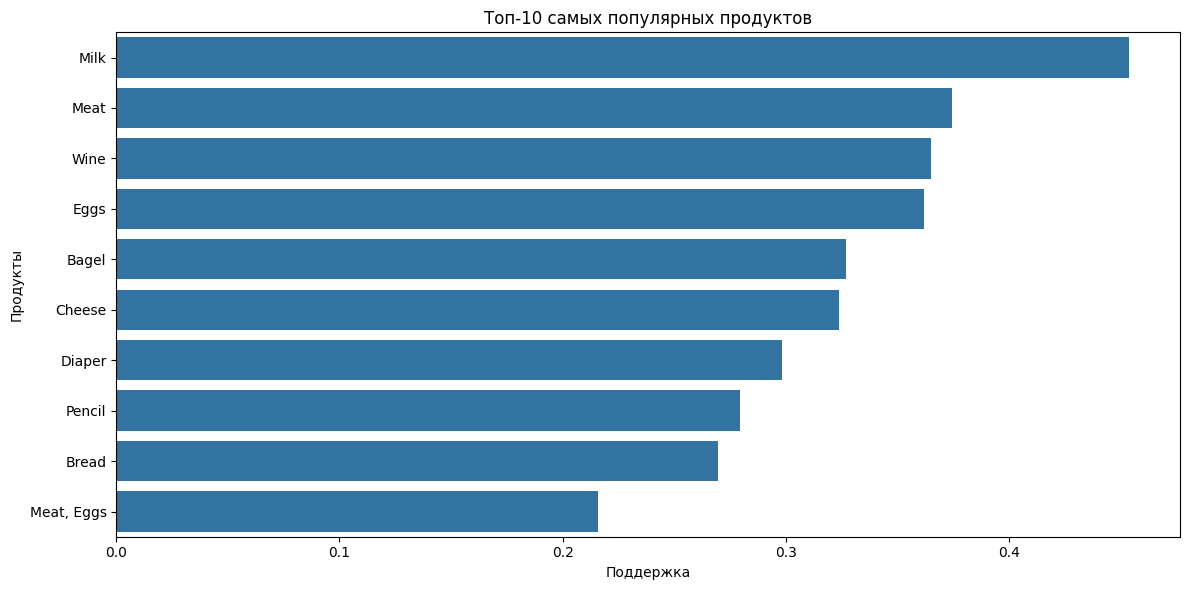

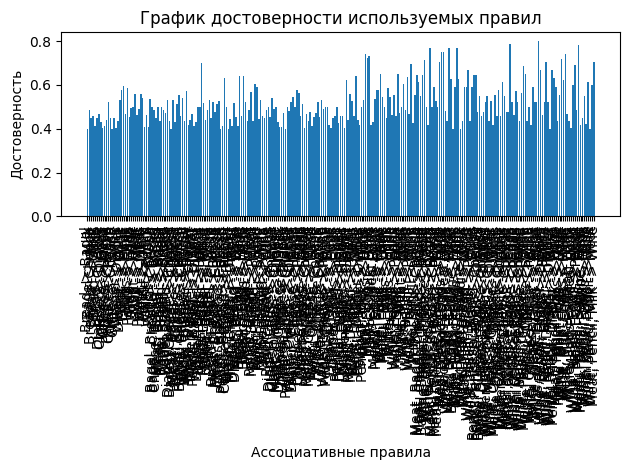

C:\Users\Artur\AppData\Local\Temp\ipykernel_3856\2721482596.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


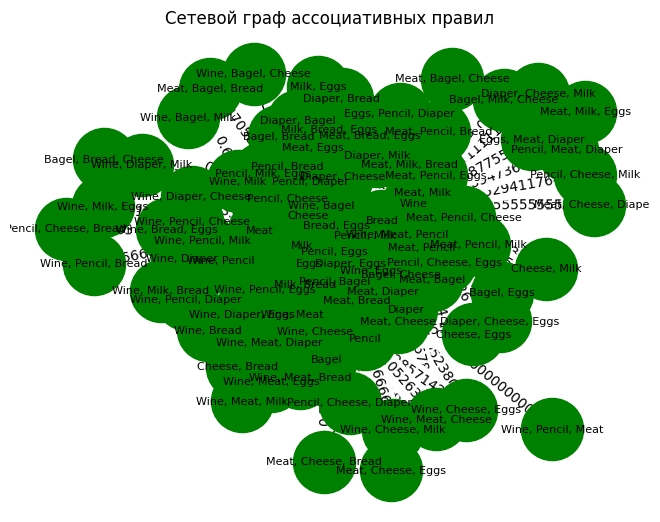

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx

#Загрузка данных
all_data = pd.read_csv('..\datasets\/retail_dataset.csv')
print(all_data)

#Анализ транзакций
transaction_lengths = all_data.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()

#Очистка данных
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

#Список уникальных товаров
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print(unique_items)

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

#Алгоритм FPG
df1 = fpgrowth(data, min_support=0.15, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.4)
print(rules)

#Алгоритм Apriori
# df1 = apriori(data, min_support=0.15, use_colnames = True)
# print(df1)
# rules = association_rules(df1, metric = "confidence", min_threshold = 0.4)
# print(rules)

#Поддержка
df1['itemsets'] = df1['itemsets'].apply(lambda x: ', '.join(list(x)))
top_products = df1.sort_values(by='support', ascending=False).head(10)
print(top_products)
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_products)
plt.title('Топ-10 самых популярных продуктов')
plt.xlabel('Поддержка')
plt.ylabel('Продукты')
plt.tight_layout()
plt.show()

rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

#График достоверности используемых правил
products_1 = rules["antecedents"].tolist()
products_2 = rules["consequents"].tolist()
confidence = rules["confidence"].tolist()
rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]
plt.bar(rules_labels, confidence)
plt.xlabel("Ассоциативные правила")
plt.ylabel("Достоверность")
plt.title("График достоверности используемых правил")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Визуализация ассоциативных правил в виде графа
G = nx.Graph()
for product in rules["antecedents"]:
    G.add_node(product)
for product in rules["consequents"]:
    G.add_node(product)
for index, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='green', font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Сетевой граф ассоциативных правил')
plt.tight_layout()
plt.show()